In [1]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2


from azure.quantum import Workspace 
from azure.quantum.qiskit import AzureQuantumProvider

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


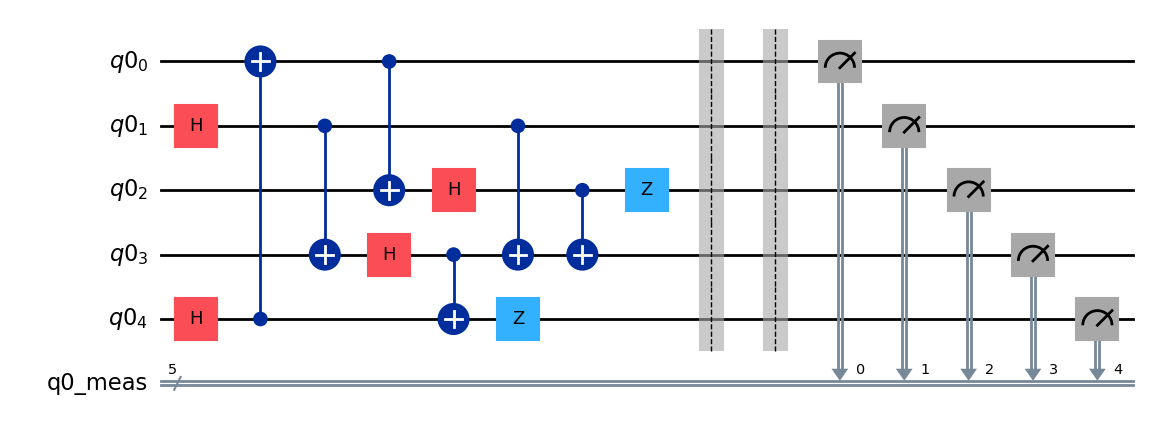

In [2]:


def load_circuit():
    qc = FiveQbStabilizerCodeCircuit(1)

    qc.encode(type='0')

    qc.measure_all()

    return qc

qc = load_circuit()
qc.draw('mpl')



In [3]:
# IonQ access
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

In [4]:
backend_name = "ionq.qpu.aria-1"
backend_name_simulator = "ionq.simulator"
backend = provider.get_backend(backend_name)
simulator_backend = provider.get_backend(backend_name_simulator)

option_params = {
    "error-mitigation": {
        "debias": False,
        "sharpen": False
    }
}

backend.options.update_options(**option_params)
simulator_backend.options.update_options(**option_params)
simulator_backend.options.update_options(noise_model="aria-1") 

In [5]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
# print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 8


In [6]:
circuits = [isa_circuit]

In [7]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)

for lq in qc.qubits:
    # state = lq.qb_measure
    state = lq.qb_measures
    # state = lq.all_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")


  q0_meas: {'11000': 192, '10001': 204, '01100': 218, '00011': 202, '00110': 186, '01010': 193, '11011': 223, '11101': 212, '01001': 206, '10010': 199, '00000': 213, '00101': 180, '11110': 191, '01111': 196, '10100': 204, '10111': 181}


Run experiment

In [8]:
shots = 3200
# job = backend.run(circuits, shots=shots)
# job = simulator_backend.run(circuits, shots=shots) # simulador
# job_id = job.id()
# pub_result = job.result()


In [18]:
results = extract_results_json_IONQ('5qb_stabilizer_T1_all_meas.json', type='percentage', reverse_order=True)

results = results[0]
print(results)

{'00000': 5.78305720537668, '00001': 0.31259768677711786, '00010': 0.12503907471084713, '00011': 6.12691466083151, '00100': 0.40637699281025325, '00101': 6.65833072835261, '00110': 5.814316974054392, '00111': 0.28133791809940606, '01000': 0.31259768677711786, '01001': 5.126602063144733, '01010': 5.626758361988121, '01011': 0.34385745545482965, '01100': 6.3769928102532045, '01101': 0.6877149109096593, '01110': 0.1875586120662707, '01111': 5.626758361988121, '10000': 0.1875586120662707, '10001': 6.220693966864645, '10010': 5.845576742732104, '10011': 0.34385745545482965, '10100': 6.845889340418881, '10101': 0.2188183807439825, '10110': 0.25007814942169426, '10111': 6.095654892153798, '11000': 5.689277899343545, '11001': 0.25007814942169426, '11010': 0.3751172241325414, '11011': 5.595498593310409, '11100': 0.2188183807439825, '11101': 5.376680212566427, '11110': 6.12691466083151, '11111': 0.5626758361988121}


In [19]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]

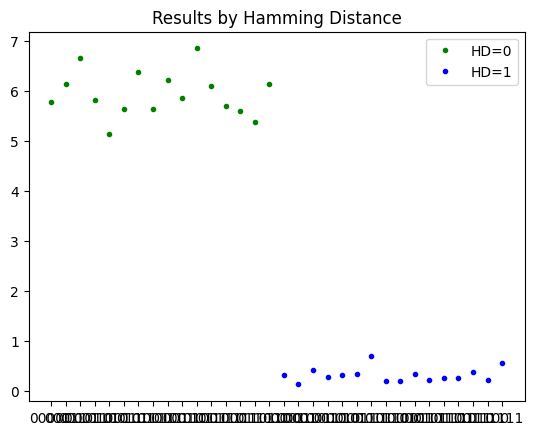

In [20]:
plot_results_hamming_distance(results, 5, valid_states)

TVD

In [21]:
tvd = calculate_tvd(results, generate_uniform_distribution(5, valid_states), percentage=True)

print(f"Total Variation Distance: {round(tvd*100,2)}%")

Total Variation Distance: 6.2%
